# PREPARACION DE DATOS / PREPROCESAMIENTO

## 1. Importación de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

### Cargando los datos

In [5]:
df = pd.read_csv("C:/Users/aprats/OneDrive - Fundacio privada quiropractica/VARIOS/AP Personal/ML/bank_dataset.CSV")

# Paso 1: Dividir el conjunto de datos

### División de los datos de la siguiente proporción: 80% entrenamiento, 20% prueba (esto se ve reflejado en el dato test_size=0.2)

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", train_set.shape)
print("Tamaño del conjunto de prueba:", test_set.shape)


Tamaño del conjunto de entrenamiento: (8929, 17)
Tamaño del conjunto de prueba: (2233, 17)


# Paso: 2 Detección Outliers con Análisis Estadístico con IQR

In [10]:
Q1 = train_set['age'].quantile(0.25)
Q3 = train_set['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



### Detectar outliers en train_set y test_set


In [12]:
outliers_train = train_set[(train_set['age'] < lower_bound) | (train_set['age'] > upper_bound)]
outliers_test = test_set[(test_set['age'] < lower_bound) | (test_set['age'] > upper_bound)]

print(f"Límites para outliers en 'age': [{lower_bound}, {upper_bound}]")
print(f"Número de outliers en train_set: {outliers_train.shape[0]}")
print(f"Número de outliers en test_set: {outliers_test.shape[0]}")


Límites para outliers en 'age': [6.5, 74.5]
Número de outliers en train_set: 132
Número de outliers en test_set: 39


In [13]:
numeric_columns = train_set.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


outliers_train = train_set[(train_set[col] < lower_bound) | (train_set[col] > upper_bound)]
outliers_test = test_set[(test_set[col] < lower_bound) | (test_set[col] > upper_bound)]

print(f"Columna: {col}")
print(f" - Límites para outliers: [{lower_bound}, {upper_bound}]")
print(f" - Número de outliers en train_set: {outliers_train.shape[0]}")
print(f" - Número de outliers en test_set: {outliers_test.shape[0]}")
print("-" * 50)



Columna: previous
 - Límites para outliers: [-1.5, 2.5]
 - Número de outliers en train_set: 999
 - Número de outliers en test_set: 259
--------------------------------------------------


### Reemplazo de outliers con límites superiores e inferiores

In [15]:
for col in numeric_columns:
    Q1 = train_set[col].quantile(0.25)
    Q3 = train_set[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


### Reemplazar valores fuera de los límites con los límites en train_set

In [17]:
train_set[col] = train_set[col].apply(lambda x: max(min(x, upper_bound), lower_bound))
test_set[col] = test_set[col].apply(lambda x: max(min(x, upper_bound), lower_bound))



In [18]:
print(f"Columna: {col}")
print(f" - Límites aplicados: [{lower_bound}, {upper_bound}]")

Columna: previous
 - Límites aplicados: [-1.5, 2.5]


### Verificamos que no existen valores nulos, si lo hubiese se tendría que imputar los valores faltantes. Como previamente se realizó la deteccion y tratamientos de Ouliers, esta todo correcto.

In [20]:
print("Valores nulos por columna:")
print(train_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          9
balance      0
housing      0
loan         0
poutcome     0
education    6
dtype: int64


In [21]:
print("Valores nulos por columna:")
print(test_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          1
balance      0
housing      0
loan         0
poutcome     0
education    1
dtype: int64


# Paso 3: Imputación de valores faltantes

### Contar Valores nulos por columnas en ambos conjuntos

In [24]:
print("Valores faltantes en el conjunto de entrenamiento:")
train_set.isnull().sum()

Valores faltantes en el conjunto de entrenamiento:


age          9
job          0
marital      5
education    6
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [25]:
print("Valores faltantes en el conjunto de prueba:")
test_set.isnull().sum()

Valores faltantes en el conjunto de prueba:


age          1
job          0
marital      0
education    1
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### Imputacion de valores faltantes, media para la 'age' ya que los valores extremos no son muy considerables, moda para 'education' ya que es una variable categorica, dejamos igual el valor en 'marital' ya que será una valor que no usaremos y a futuro desistimaremos de nuestro DataFrame.
Esta imputación se realizará en ambos conjuntos

### Gestión de Valores Faltantes

In [28]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Columnas en test_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [29]:
education_mode = train_set['education'].mode()[0]
train_set['education'] = train_set['education'].fillna(education_mode)
test_set['education'] = test_set['education'].fillna(education_mode)

age_median = train_set['age'].median()
train_set['age'] = train_set['age'].fillna(age_median)
test_set['age'] = test_set['age'].fillna(age_median)


In [30]:
print("Valores faltantes en 'education' después de la imputación:")
print(train_set['education'].isnull().sum())
print(test_set['education'].isnull().sum())

print("\nValores faltantes en 'age' después de la imputación:")
print(train_set['age'].isnull().sum())
print(test_set['age'].isnull().sum())


Valores faltantes en 'education' después de la imputación:
0
0

Valores faltantes en 'age' después de la imputación:
0
0


##### Se verifica que no hay valores faltantes en las características imputadas

# Paso 3: Codificación de variables categóricas

#### En este paso, convertiré las variables categóricas en un formato numérico para que puedan ser utilizadas por los algoritmos de machine learning:

One-Hot Encoding: Para variables categóricas sin orden inherente.

Label Encoding: Para variables categóricas con un orden lógico.

#### Se Identifican las variables categóricas y según su caracteristica se trabajara la codificación,Se aplica Label Encoding en 'housing', 'loan' al ser binarias, lo caul es más simple y eficiente, en cuanto a 'poutcome'  no es binario, sino una categoría multiple, pero podría tener un orden implícito por eso es más recomendable aplicar la misma codificacion de etiqueta y en 'education' One-Hot Encoding


In [35]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#### Se aplicara One-Hot Encoding en 'education' que no tiene un orden inherente

In [37]:
codificador = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_codificado = codificador.fit_transform(train_set[['education']])
test_codificado = codificador.transform(test_set[['education']])



#### Convertir el resultado en DataFrame y concatenación de columnas

In [39]:
education_columns = codificador.get_feature_names_out(['education'])
train_set = pd.concat([train_set.drop('education', axis=1), 
                       pd.DataFrame(train_codificado, columns=education_columns, index=train_set.index)], axis=1)

test_set = pd.concat([test_set.drop('education', axis=1), 
                      pd.DataFrame(test_codificado, columns=education_columns, index=test_set.index)], axis=1)

print("One-Hot Encoding aplicado a 'education'.")

One-Hot Encoding aplicado a 'education'.


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
for col in ['housing', 'loan', 'poutcome']:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])
    test_set[col] = le.transform(test_set[col]) 
    
print("Label Encoding aplicado a 'housing', 'loan', y 'poutcome'.")


Label Encoding aplicado a 'housing', 'loan', y 'poutcome'.


In [42]:
print(train_set.head())  

        age           job   marital default  balance  housing  loan   contact  \
3955   28.0       student    single      no     5741        0     0  cellular   
11150  34.0    management   married      no      355        0     0  cellular   
5173   48.0    unemployed  divorced      no      201        0     0  cellular   
3017   53.0  entrepreneur   married      no     1961        0     0  cellular   
2910   53.0    management   married      no     1624        0     0  cellular   

       day month  duration  campaign  pdays  previous  poutcome deposit  \
3955    10   sep      1042         5    200       2.5         0     yes   
11150   21   aug       314         3     -1       0.0         3      no   
5173    10   nov       594         1     91       1.0         2     yes   
3017    15   dec       351         1     -1       0.0         3     yes   
2910    11   nov       166         3     97       2.5         2     yes   

       education_primary  education_secondary  education_terti

In [43]:
print(test_set.head())   

       age          job   marital default  balance  housing  loan   contact  \
5527  65.0      retired  divorced      no      744        0     0  cellular   
4541  38.0  blue-collar   married      no     1627        0     0   unknown   
1964  35.0  blue-collar    single      no     4963        1     0  cellular   
5007  47.0  blue-collar   married      no     8229        0     0  cellular   
8928  35.0   technician   married      no     1473        1     0   unknown   

      day month  duration  campaign  pdays  previous  poutcome deposit  \
5527    5   jul       182         1     -1       0.0         3      no   
4541   16   jun      1323         9     -1       0.0         3     yes   
1964   14   may       456         1    300       1.0         0     yes   
5007    8   aug       784         2     -1       0.0         3     yes   
8928   12   may        84         3     -1       0.0         3      no   

      education_primary  education_secondary  education_tertiary  \
5527        

#### En cuanto a la característica 'deposit' al ser una variable objetivo se procede a convertirlo en información binaria, debido a su sencilles a la hora de su interprestación en ela predicción.

In [45]:
train_set['deposit'] = train_set['deposit'].map({'yes': 1, 'no': 0})
test_set['deposit'] = test_set['deposit'].map({'yes': 1, 'no': 0})

print(train_set['deposit'].head())
print(test_set['deposit'].head())


3955     1
11150    0
5173     1
3017     1
2910     1
Name: deposit, dtype: int64
5527    0
4541    1
1964    1
5007    1
8928    0
Name: deposit, dtype: int64


# Paso 4: Estandarización

#### La estandarización asegura que todas las características numéricas tengan una media de 0 y una desviación estándar de 1. Esto es importante porque muchos algoritmos (por ejemplo, regresión logística, SVM, k-means) son sensibles a la escala de las características.

##### Se Identifica  las columnas numéricas para trabajar directamente con ellas, así aseguramos que estamos tomando todas las caracteristicas de nuesto DataFrame, de ambos conjuntos

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
num_columns = train_set.select_dtypes(include=['float64', 'int64']).columns

In [51]:
scaler = StandardScaler()

train_set[num_columns] = scaler.fit_transform(train_set[num_columns])
test_set[num_columns] = scaler.transform(test_set[num_columns])


In [52]:
print("Media después de la estandarización (train_set):")
print(train_set[num_columns].mean())

print("\nDesviación estándar después de la estandarización (train_set):")
print(train_set[num_columns].std())


Media después de la estandarización (train_set):
age                    2.530548e-16
balance                1.870059e-17
day                    4.774618e-18
duration               5.431128e-17
campaign              -4.058425e-17
pdays                 -1.352808e-17
previous              -1.989424e-17
deposit               -9.071774e-17
education_primary     -5.252080e-17
education_secondary    2.248049e-17
education_tertiary    -6.167215e-17
education_unknown     -6.207003e-17
dtype: float64

Desviación estándar después de la estandarización (train_set):
age                    1.000056
balance                1.000056
day                    1.000056
duration               1.000056
campaign               1.000056
pdays                  1.000056
previous               1.000056
deposit                1.000056
education_primary      1.000056
education_secondary    1.000056
education_tertiary     1.000056
education_unknown      1.000056
dtype: float64


#### Según este resultado las medias de las columnas son cercacnas al 0 y la desviación estándar cercana a 1

# Paso 5: Generación de Nuevas Características

##### Con la idea de mejorar el desempeño del modelo se determina generar nuevas características, ya que estas variables tienen impacto en el resultado objetivo 'deposit', así podremos simplificar el modelo y evitar sobreajuste.

##### tomo la cataegoria 'balance' y  'age' porque puede capturar relaciones relevantes entre la edad del cliente y su nivel financiero, esto ayudará a que el modelo interprete más facilmente diferencias cualitativas

In [57]:
train_set['age_balance_interaction'] = train_set['age'] * train_set['balance']

##### Categorizar 'balance' en rangos, esto solo se aplica

In [59]:
bins = [-float('inf'), 0, 1000, 5000, float('inf')]
labels = ['deuda', 'bajo', 'medio', 'alto']

train_set['balance_category'] = pd.cut(train_set['balance'], bins=bins, labels=labels)

##### Crear una nueva columna: ratio entre 'balance' y 'age'

###### Se aplica +1 para evitar divisiones por cero

In [62]:
train_set['balance_age_ratio'] = train_set['balance'] / (train_set['age'] + 1)  


In [63]:
print(train_set[['age', 'balance', 'age_balance_interaction', 'balance_category', 'balance_age_ratio']].head())


            age   balance  age_balance_interaction balance_category  \
3955  -1.114367  1.346271                -1.500239             bajo   
11150 -0.609465 -0.371778                 0.226586            deuda   
5173   0.568639 -0.420902                -0.239341            deuda   
3017   0.989390  0.140511                 0.139020             bajo   
2910   0.989390  0.033013                 0.032663             bajo   

       balance_age_ratio  
3955          -11.771537  
11150          -0.951972  
5173           -0.268323  
3017            0.070630  
2910            0.016594  


#### Nos aseguramos que en el conjunto de prueba no contiene estas columnas

In [65]:
test_set = test_set.drop(columns=['age_balance_interaction', 'balance_category', 'balance_age_ratio'], errors='ignore')


# Paso 5: Reducción de dimensionalidad con PCA 

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [84]:
numeric_columns = train_set.drop('deposit', axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_columns = test_set.drop('deposit', axis=1).select_dtypes(include=['float64', 'int64']).columns

print("Columnas numéricas para PCA:")
print(numeric_columns)


Columnas numéricas para PCA:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')


In [86]:
pca = PCA()
train_pca = pca.fit_transform(train_set[numeric_columns])
test_pca = pca.fit_transform(test_set[numeric_columns])


### Varianza explicada acumulada

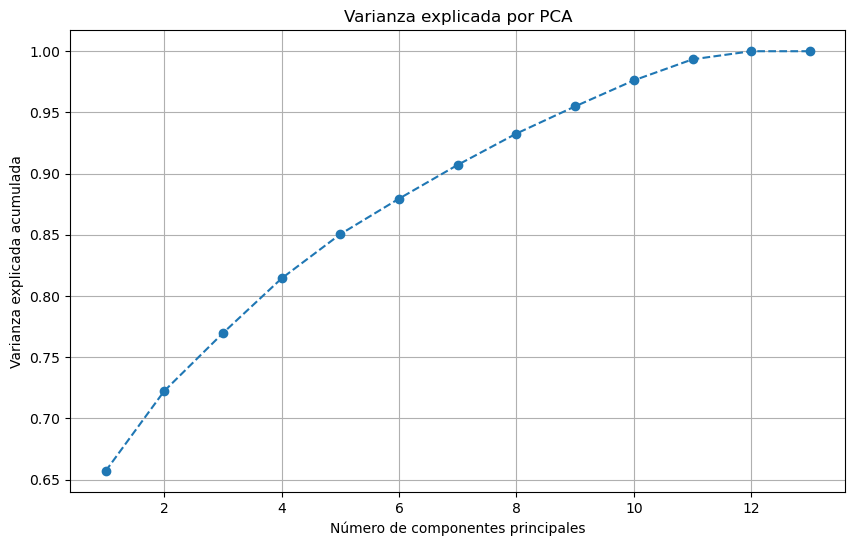

In [71]:

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()



In [101]:
pca_optimo = PCA(n_components=0.95)
train_pca = pca_optimo.fit_transform(train_set[numeric_columns])
test_pca = pca_optimo.fit_transform(test_set[numeric_columns])

print(f"Número de componentes seleccionados: {pca_optimo.n_components_}")

Número de componentes seleccionados: 9


#### Convertir los datos PCA a DataFrame

In [103]:
train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(train_pca.shape[1])])
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(test_pca.shape[1])])

In [105]:
train_pca_df['deposit'] = train_set['deposit'].values
test_pca_df['deposit'] = test_set['deposit'].values

print("Reducción de dimensionalidad completada.")
print("Conjunto de datos transformado con PCA:")
print(train_pca_df.head())

Reducción de dimensionalidad completada.
Conjunto de datos transformado con PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.731891 -1.233195 -0.928275 -0.189475 -0.356786  1.272627  1.603097   
1 -0.993138  1.236650 -0.607762  0.421986 -0.156139 -0.079077  0.041371   
2  0.631278  1.432704  0.333535 -0.792350  0.020826  0.091833  0.342725   
3 -0.172533 -1.651972 -0.315348 -0.620229  0.132380  0.358381 -0.416873   
4  2.232387 -1.327785  0.014406  0.366015 -0.194484  0.049879 -0.554854   

        PC8       PC9   deposit  
0  1.687012 -0.940179  1.055876  
1 -0.315762 -0.202882 -0.947081  
2  0.095624  0.739123  1.055876  
3 -0.479029  1.085705  1.055876  
4  0.388582  1.151971  1.055876  


In [107]:
print(test_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.540601  0.887457 -1.105715 -0.315491 -0.554567 -0.375261 -1.287839   
1 -1.523850  0.934721 -0.290604  1.047369 -0.051903 -0.181505  3.270845   
2  1.872771  1.474625 -0.276230  1.136232 -0.299699 -0.117266  0.057476   
3 -0.479137  0.449032 -1.066209  2.264771 -1.096834 -0.739732  0.150305   
4 -0.374886 -1.264933  1.523215 -0.098036  0.223070  0.250888 -0.570812   

        PC8       PC9   deposit  
0 -1.157238  1.656797 -0.947081  
1 -0.219917  0.600956  1.055876  
2  0.112776 -0.616543  1.055876  
3 -0.842365  0.302552  1.055876  
4 -0.775599 -0.065946 -0.947081  
